https://github.com/facebook/prophet
https://facebook.github.io/prophet/docs/quick_start.html#python-api


* Prophet is for forecasting time series data
* Additive model where non-linear trends are fit with yearly and weekly seasonality, plus holidays
* Works best with daily periodicity data with at least one year of historical data
* Robust to missing data, shifts in the trend, and large outliers.

## Input
The input to Prophet is always a dataframe with two columns: `ds` and `y`. The ds (datestamp) column must contain a date or datetime (either is fine). The y column must be numeric, and represents the measurement we wish to forecast.

## `sklearn`-like
* Instantiate
* `.model()`
* `.fit()`

# Installation
1. `pip install pystan` (better yet, use a docker container, [pystan installation can be hairy](http://pystan.readthedocs.io/en/latest/installation_beginner.html))
1. `pip install fbprophet`

## Or (easiest)
`conda install -c conda-forge fbprophet`

In [1]:
import quilt
quilt.install("examples/prophet", force=True)

All fragments are already downloaded!


In [2]:
import pandas as pd
import numpy as np
from fbprophet import Prophet

from quilt.data.examples import prophet as pdata

In [3]:
df = pdata.peyton_manning()
df.head()

,ds,y
0,2007-12-10,14629
1,2007-12-11,5012
2,2007-12-12,3582
3,2007-12-13,3205
4,2007-12-14,2680


In [4]:
df.describe()

,y
count,2905.000000
mean,5794.732186
std,13864.136069
min,193.000000
25%,1835.000000
50%,2975.000000
75%,5325.000000
max,379552.000000


In [5]:
m = Prophet()
# log transform views to tame magnitude
df['y'] = np.log(df['y'])
m.fit(df)

INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/Users/karve/anaconda3/envs/dev/lib/python3.6/site-packages/pystan/misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):


In [6]:
future = m.make_future_dataframe(periods=365)
future.head()

,ds
0,2007-12-10
1,2007-12-11
2,2007-12-12
3,2007-12-13
4,2007-12-14


In [7]:
forecast = m.predict(future)

In [8]:
forecast.head()

,ds,trend,trend_lower,trend_upper,yhat_lower,yhat_upper,seasonal,seasonal_lower,seasonal_upper,seasonalities,seasonalities_lower,seasonalities_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,yhat
0,2007-12-10,8.044384,8.044384,8.044384,8.202867,9.442859,0.802842,0.802842,0.802842,0.802842,0.802842,0.802842,0.352313,0.352313,0.352313,0.450529,0.450529,0.450529,8.847226
1,2007-12-11,8.042831,8.042831,8.042831,7.982325,9.218771,0.552870,0.552870,0.552870,0.552870,0.552870,0.552870,0.119648,0.119648,0.119648,0.433223,0.433223,0.433223,8.595701
2,2007-12-12,8.041278,8.041278,8.041278,7.777612,9.077712,0.350178,0.350178,0.350178,0.350178,0.350178,0.350178,-0.066673,-0.066673,-0.066673,0.416851,0.416851,0.416851,8.391457
3,2007-12-13,8.039726,8.039726,8.039726,7.758909,9.041947,0.329616,0.329616,0.329616,0.329616,0.329616,0.329616,-0.072244,-0.072244,-0.072244,0.401860,0.401860,0.401860,8.369342
4,2007-12-14,8.038173,8.038173,8.038173,7.742776,8.993472,0.319068,0.319068,0.319068,0.319068,0.319068,0.319068,-0.069588,-0.069588,-0.069588,0.388656,0.388656,0.388656,8.357241


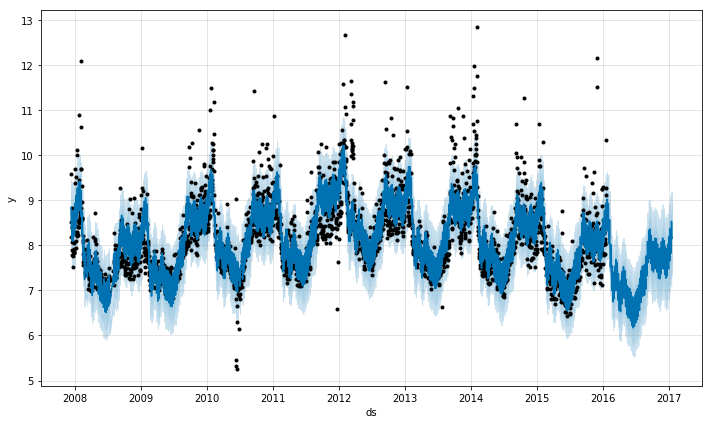

In [9]:
m.plot(forecast)

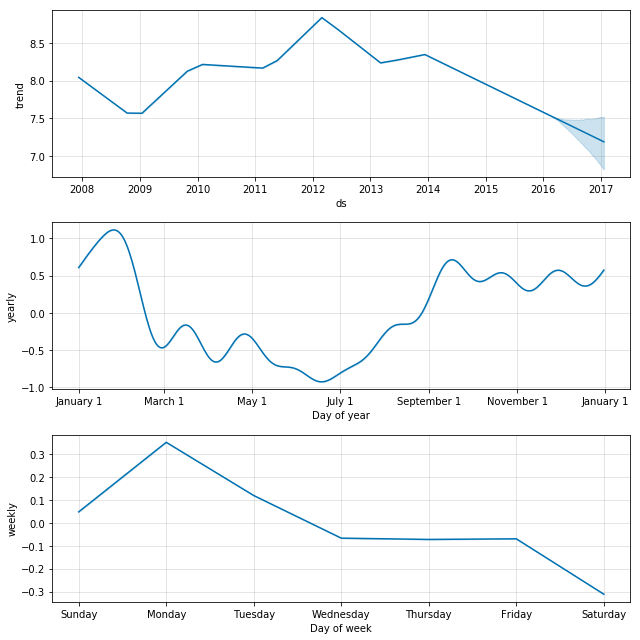

In [10]:
m.plot_components(forecast)